In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%run run_sii.py

¿Actualizar datos históricos?  [n]/y: n
¿Actualizar año presente?  [y]/n: n


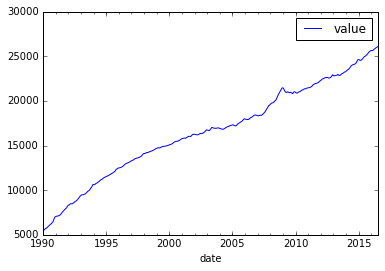

In [3]:
karg_csv = dict(parse_dates=True, index_col=0)
uf = pd.read_csv('uf.csv', **karg_csv)
uf.plot()

In [4]:
uf.tail()

,value
date,
2016-07-05,26060.75
2016-07-06,26062.48
2016-07-07,26064.22
2016-07-08,26065.96
2016-07-09,26067.69


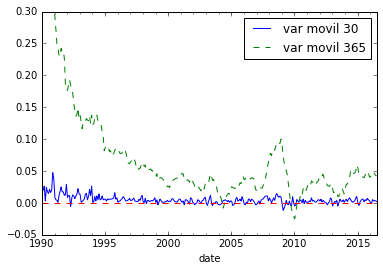

In [5]:
# Variacion movil 30 dias
ax = uf.pct_change(30).plot()
# Variacion movil 365 dias
uf.pct_change(365).plot(style='--', ax=ax)
plt.axhline(y=0, color='r', linestyle='--')
plt.legend(['var movil 30','var movil 365'])

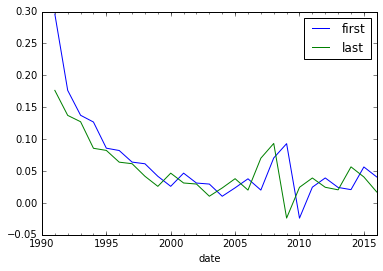

In [6]:
# Variacion anual primer dia agno
ax = uf.value.resample('A').first().pct_change(1).plot()
# Variacion anual ultimo dia agno
uf.value.resample('A').last().pct_change(1).plot(ax=ax)
plt.legend(['first','last'])

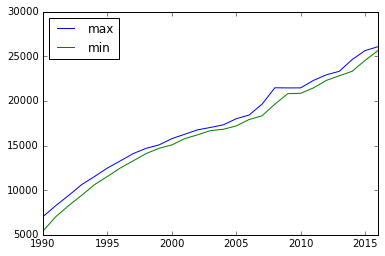

In [7]:
# Valor maximo agno calendario
ax = uf.groupby(lambda x: x.year).agg(pd.np.max).plot()
# Valor minimo agno calendario
uf.groupby(lambda x: x.year).agg(pd.np.min).plot(ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(['max','min'], loc='best')

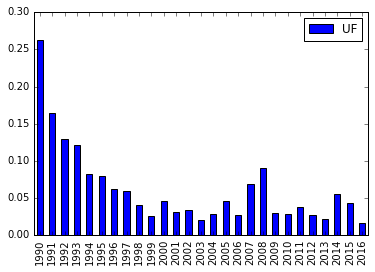

In [8]:
# Valor (max - min) / mean de un array 
def maxrate(x):
    return (np.max(x) - np.min(x)) / np.mean(x)

# Maxima variacion en un agno calendario
uf.groupby(lambda x: x.year).agg(maxrate).plot(kind='bar')
plt.legend(['UF'])

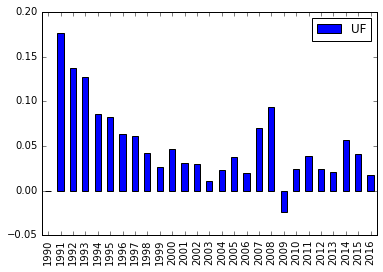

In [9]:
# Variacion ultimo dia del agno calendario
aux = uf.resample('A').last().pct_change()
# Indice agno
aux.index = map(lambda x: x.year, aux.index)
# Grafica con barras
aux.plot(kind='bar')
plt.legend(['UF'])